 DNA CONDON USAGE

INTRODUCTION

DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa

DATASET OVERVIEW

We examined codon usage frequencies in the genomic coding DNA of a large sample of diverse organisms from different taxa tabulated in the CUTG database, where we further manually curated and harmonized these existing entries by re-classifying CUTG's bacteria (bct) class into archaea (arc), plasmids (plm), and bacteria proper (keeping with the original label `bct').  The reclassification in the original `bct' domain was simplified by extracting from files `qbxxx.spsum.txt' (where xxx = bct (bacteria), inv (invertebrates), mam (mammals), pln (plants), pri (primates), rod (rodents), vrt (vertebrates)) the different genus names of the entries, and making the classification by genus. There were 514 different genus names.  The different genus categories were checked and relabeled as `arc' where appropriate. In the eubacterial entries, the distinction was made of the bacterial genomes proper (keeping with the original label `bct'), and bacterial plasmids (now labeled `plm').

Variable Information

Column 1: Kingdom
Column 2: DNAtype
Column 3: SpeciesID
Column 4: Ncodons
Column 5: SpeciesName
Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number))

The 'Kingdom' is a 3-letter code corresponding to `xxx' in the CUTG database name: 'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries.  Note that the CUTG database does not contain 'arc' and 'plm' (these have been manually curated ourselves). 

The 'DNAtype' is denoted as an integer for the genomic composition in the species: 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.

The species identifier ('SpeciesID') is an integer, which uniquely indicates the entries of an organism. It is an accession identifier for each different species in the original CUTG database, followed by the first item listed in each genome. 

The number of codons (`Ncodons') is the algebraic sum of the numbers listed for the different codons in an entry of CUTG. Codon frequencies are normalized to the total codon count, hence the number of occurrences divided by 'Ncodons' is the codon frequencies listed in the data file. 

The species' name ('SpeciesName') is represented in strings purged of `comma'. This is a descriptive label of the name of the species for data interpretations. 

Lastly, the codon frequencies ('codon') including 'UUU', 'UUA', 'UUG', 'CUU', etc., are recorded as floats (with decimals in 5 digits).

IMPORTING THE DATA

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
file_path = "C:\\Users\\HP\\Desktop\\condon pro.csv"  
df = pd.read_csv("C:\\Users\\HP\\Desktop\\condon pro.csv", dtype=str, low_memory=False)
df

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,5.00E-04,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,5.00E-04,0
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.0156,0.0441,0.00271,0.00068,0
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.0141,0.01671,0.0376,0.01932,0.03029,0.03446,0.00261,0.00157,0
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.0138,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.0082,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0,0,0,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.0251,0.02896,0.03959,0.00099,0.00079,0.00156


In [71]:
df.describe()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028,13028,13028,13028,13028,13028,13028,13028,13028,13028,...,13028,13028,13028,13028,13028,13028,13028,13028,13028,13028
unique,11,11,12368,7103,13016,4791,4121,4796,3282,3677,...,2136,2835,2228,4578,4416,4827,4686,703,422,1786
top,bct,0,3885,1140,Escherichia coli O157,0,0.01911,0,0,0.02564,...,0,0,0,0,0,0.01316,0,0,0,0
freq,2920,9267,4,67,4,81,43,460,452,43,...,1399,1772,2230,261,114,55,438,1812,4329,2145


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Kingdom      13028 non-null  object
 1   DNAtype      13028 non-null  object
 2   SpeciesID    13028 non-null  object
 3   Ncodons      13028 non-null  object
 4   SpeciesName  13028 non-null  object
 5   UUU          13028 non-null  object
 6   UUC          13028 non-null  object
 7   UUA          13028 non-null  object
 8   UUG          13028 non-null  object
 9   CUU          13028 non-null  object
 10  CUC          13028 non-null  object
 11  CUA          13028 non-null  object
 12  CUG          13028 non-null  object
 13  AUU          13028 non-null  object
 14  AUC          13028 non-null  object
 15  AUA          13028 non-null  object
 16  AUG          13028 non-null  object
 17  GUU          13028 non-null  object
 18  GUC          13028 non-null  object
 19  GUA          13028 non-nu

DATA PREPROCESSING

In [74]:
df.isnull().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [75]:
for col in df.columns[5:]: 
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns after conversion:", non_numeric_cols)

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


Non-numeric columns after conversion: Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName'], dtype='object')


In [76]:
df

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [77]:
def codon_summary(df):
    codon_cols = df.columns[5:] 
    summary = df[codon_cols].describe().T  
    return summary

In [78]:
summary_df = codon_summary(df)
print("\nCodon Usage Summary:")
print(summary_df.head(10)) 


Codon Usage Summary:
       count      mean       std  min       25%       50%       75%      max
UUU  13028.0  0.024818  0.017626  0.0  0.013910  0.021755  0.031302  0.21730
UUC  13028.0  0.023442  0.011599  0.0  0.015380  0.021910  0.029212  0.09169
UUA  13028.0  0.020637  0.020709  0.0  0.005610  0.015260  0.029485  0.15133
UUG  13028.0  0.014104  0.009280  0.0  0.007108  0.013360  0.019810  0.10119
CUU  13028.0  0.017820  0.010586  0.0  0.010890  0.016130  0.022730  0.08978
CUC  13028.0  0.018288  0.014572  0.0  0.007830  0.014560  0.025112  0.10035
CUA  13028.0  0.019044  0.024250  0.0  0.005307  0.009685  0.017245  0.16392
CUG  13028.0  0.018450  0.016578  0.0  0.007180  0.012800  0.024315  0.10737
AUU  13028.0  0.028352  0.017507  0.0  0.016360  0.025475  0.038113  0.15406
AUC  13028.0  0.025041  0.014600  0.0  0.015130  0.021540  0.031860  0.08860


VISUALIZATION AND SCALING

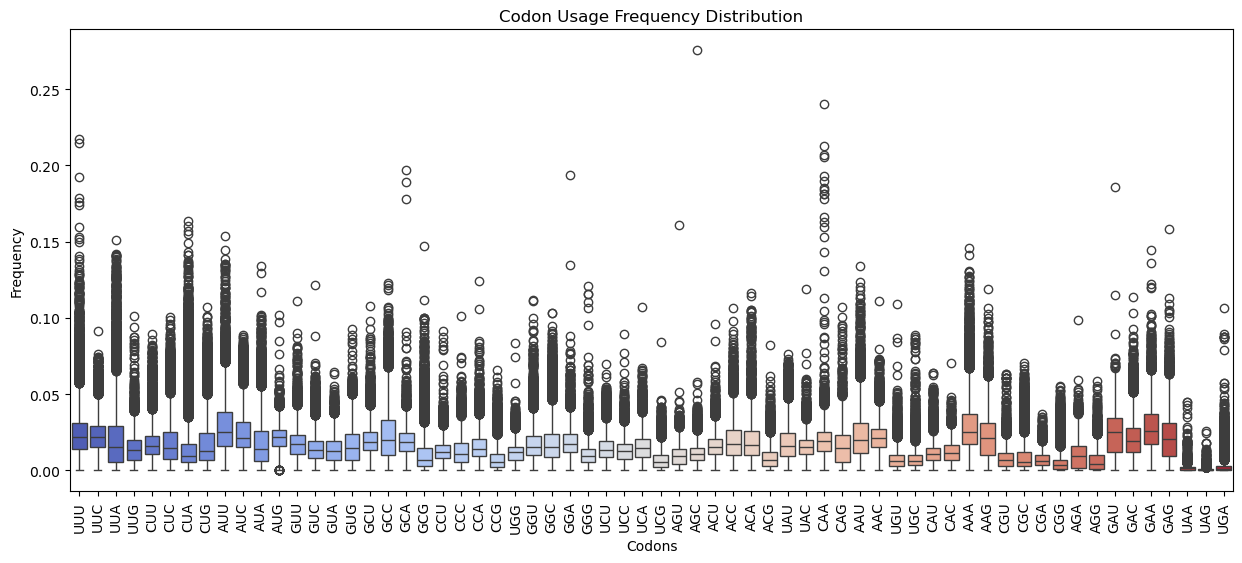

In [80]:
#codon frequency distribution
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, 5:], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Codon Usage Frequency Distribution")
plt.xlabel("Codons")
plt.ylabel("Frequency")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12624\1867951751.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Kingdom", y="UUU", data=df, estimator=sum, ci=None, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_12624\1867951751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kingdom", y="UUU", data=df, estimator=sum, ci=None, palette="Set2")


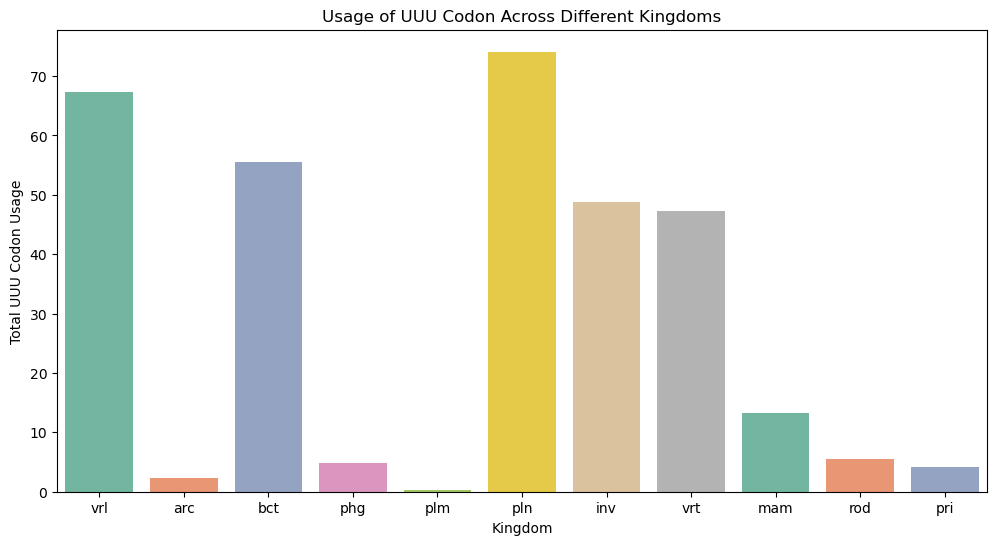

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Kingdom", y="UUU", data=df, estimator=sum, ci=None, palette="Set2")
plt.title("Usage of UUU Codon Across Different Kingdoms")
plt.xlabel("Kingdom")
plt.ylabel("Total UUU Codon Usage")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12624\3107536638.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Kingdom", y="UUC", data=df, estimator=sum, ci=None, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_12624\3107536638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kingdom", y="UUC", data=df, estimator=sum, ci=None, palette="Set2")


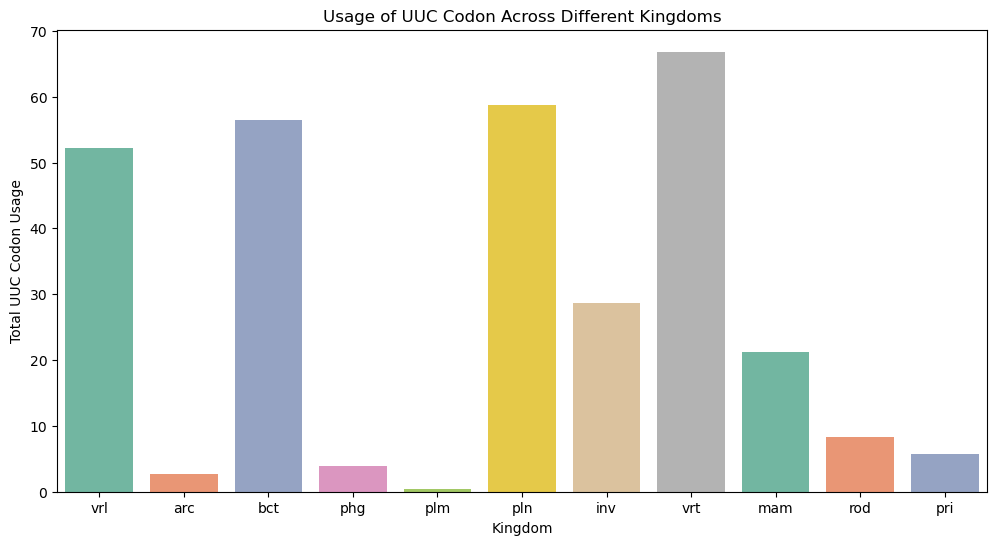

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Kingdom", y="UUC", data=df, estimator=sum, ci=None, palette="Set2")
plt.title("Usage of UUC Codon Across Different Kingdoms")
plt.xlabel("Kingdom")
plt.ylabel("Total UUC Codon Usage")
plt.show()

MODEL SELECTION AND MODEL BUILDING

In [84]:
# models 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report


In [85]:
# Convert codon columns to numeric
df.iloc[:, 5:] = df.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')


In [86]:
# Drop categorical column "DNAtype"
df = df.drop(columns=["DNAtype"])


In [87]:
# Define features and target variable
X = df.drop(columns=["Ncodons"])
y = df["Ncodons"]

In [118]:
# Convert numeric values, set non-numeric to NaN
X = X.apply(pd.to_numeric, errors='coerce') 
X.fillna(X.median(), inplace=True)  
X_numeric = X.select_dtypes(include=['number'])  
X_numeric.fillna(X_numeric.median(), inplace=True)  
X.update(X_numeric)  
X = X.drop(columns=['Kingdom', 'SpeciesName'])


In [122]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [126]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [128]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Regression Model : 
By using this we can predict
1. Ncodons: The total number of codons used in each species
2. Individual codon frequencies (e.g., UUU, UUC, etc.) : predict relationship between different condins to predict missing or expected values.


In [139]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [141]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=10, random_state=42),
    "Support Vector": SVR(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
}
results = []

In [168]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R² Score:", r2_score(y_test, y_pred))
    print(f"{name} -> RMSE: {rmse:.2f}, R² Score: {r2:.4f}")
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("-" * 50)



Linear Regression R² Score: 0.012223754793864283
Linear Regression -> RMSE: 896248.89, R² Score: 0.0122
Linear Regression RMSE: 892550.4666228992
--------------------------------------------------
Decision Tree R² Score: -1.3378041885272753
Decision Tree -> RMSE: 896248.89, R² Score: 0.0122
Decision Tree RMSE: 1373117.0465355262
--------------------------------------------------
Random Forest R² Score: -0.042442811818899306
Random Forest -> RMSE: 896248.89, R² Score: 0.0122
Random Forest RMSE: 916916.1285202488
--------------------------------------------------
Gradient Boosting R² Score: 0.00942827097887955
Gradient Boosting -> RMSE: 896248.89, R² Score: 0.0122
Gradient Boosting RMSE: 893812.5680097105
--------------------------------------------------
Support Vector R² Score: -0.009589358952688976
Support Vector -> RMSE: 896248.89, R² Score: 0.0122
Support Vector RMSE: 902351.7704116812
--------------------------------------------------
Neural Network R² Score: 0.004020780694443338
N

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [170]:
# Find the best model
best_model = min(results, key=lambda k: results[k]["RMSE"])
print(f"Best Model: {best_model} with RMSE = {results[best_model]['RMSE']:.2f}")


Best Model: Linear Regression with RMSE = 892550.47


In [208]:
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

#predictions
test_samples = X_test.sample(10, random_state=42)
y_pred_samples = rf_model.predict(test_samples)
actual_values = y_test.iloc[test_samples.index.to_numpy()]

In [214]:
# Display predictions
predictions_df = pd.DataFrame({"Actual N condons": y_test.iloc[test_samples.index].values, "Predicted N condons": y_pred_samples})
print(predictions_df)


  Actual N condons  Predicted N condons
0             3249               3502.8
1             1001               7340.3
2             1806               1890.9
3            22891              19161.3
4             1167              12172.5
5            23753              43786.7
6            48979               6319.8
7            29918              17470.3
8             3369               3338.9
9             2117               2117.0


VISUALIZATION

In [231]:
best_model = LinearRegression()  
best_model.fit(X_train, y_train)

LinearRegression()

In [267]:
y_Actual_N_condons = pd.to_numeric(y_test, errors="coerce")
y_Predicted_N_condons = best_model.predict(X_test)
y_Actual_N_condons = np.array(y_Actual_N_condons)
y_Predicted_N_condons = np.array(y_Predicted_N_condons)

In [269]:
print("Actual:", y_Actual_N_condons[:5])
print("Predicted:", y_Predicted_N_condons[:5])


Actual: [1743874   10915    1260  208484  420455]
Predicted: [255036.54810216  -5613.32785094  30174.49546469 144622.55311721
 240484.33464736]


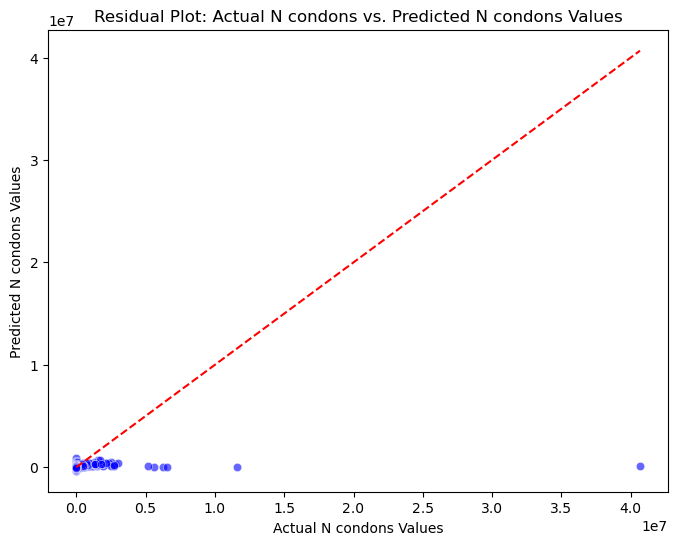

In [271]:
# Create residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_Actual_N_condons, y=y_Predicted_N_condons, color="blue", alpha=0.6)
plt.plot([min(y_Actual_N_condons), max(y_Actual_N_condons)], [min(y_Actual_N_condons), max(y_Actual_N_condons)], color="red", linestyle="--")
plt.xlabel("Actual N condons Values")
plt.ylabel("Predicted N condons Values")
plt.title("Residual Plot: Actual N condons vs. Predicted N condons Values")
plt.show()